In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("bltmat", "/Users/claudiopierard/WRF/bltmat.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
pd.set_option('html', False)
%matplotlib inline

In [3]:
index = pd.date_range('1/1/2000', periods=8)

In [4]:
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))

In [5]:
df

                   A         B         C
2000-01-01 -0.376985  1.000947 -1.469570
2000-01-02 -0.508165  0.316291 -0.465628
2000-01-03 -0.935359  1.777102 -1.108774
2000-01-04  0.887846 -0.228837 -0.062184
2000-01-05  0.246587 -1.126455  1.983118
2000-01-06  0.165024 -0.559321  2.192112
2000-01-07  1.411757 -1.538417  0.633776
2000-01-08  0.830169  0.675101  0.360864

In [6]:
new_index = pd.date_range('28/12/1999 ', periods = 30)

In [7]:
new_index

DatetimeIndex(['1999-12-28', '1999-12-29', '1999-12-30', '1999-12-31',
               '2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df.reindex(new_index)

                   A         B         C
1999-12-28       NaN       NaN       NaN
1999-12-29       NaN       NaN       NaN
1999-12-30       NaN       NaN       NaN
1999-12-31       NaN       NaN       NaN
2000-01-01 -0.376985  1.000947 -1.469570
2000-01-02 -0.508165  0.316291 -0.465628
2000-01-03 -0.935359  1.777102 -1.108774
2000-01-04  0.887846 -0.228837 -0.062184
2000-01-05  0.246587 -1.126455  1.983118
2000-01-06  0.165024 -0.559321  2.192112
2000-01-07  1.411757 -1.538417  0.633776
2000-01-08  0.830169  0.675101  0.360864
2000-01-09       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN
2000-01-12       NaN       NaN       NaN
2000-01-13       NaN       NaN       NaN
2000-01-14       NaN       NaN       NaN
2000-01-15       NaN       NaN       NaN
2000-01-16       NaN       NaN       NaN
2000-01-17       NaN       NaN       NaN
2000-01-18       NaN       NaN       NaN
2000-01-19       NaN       NaN       NaN
2000-01-20      

In [9]:
new_index = pd.date_range('2015-01-01 00:00:00', '2015-01-31 23:50:00', freq='10Min')

-----
# Trabajando con datos del ceilómetro en UTC para enero

In [10]:
jan_df = pd.read_csv('/Users/claudiopierard/WRF/Datos/ceilometro/2015_utc/jan_2015_utc.dat', sep=' ', index_col=0, names=['Raw', 'Filtered'])

In [11]:
jan_df.index = pd.to_datetime(jan_df.index)

In [12]:
jan_df.head()

                        Raw  Filtered
2015-01-09 17:50:00   620.0     620.0
2015-01-09 18:00:00   610.0     610.0
2015-01-09 18:10:00   700.0     700.0
2015-01-09 18:20:00  1330.0    1330.0
2015-01-09 18:30:00  1800.0    1800.0

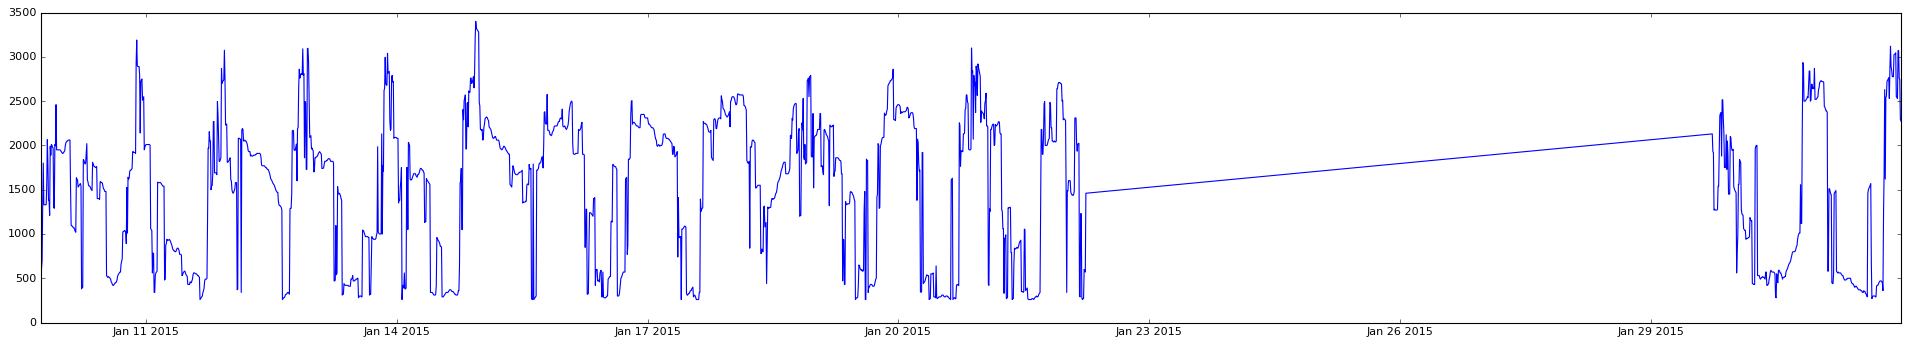

In [13]:
plt.figure(figsize=(30,5))
plt.plot(jan_df.Raw)

In [14]:
new_index = pd.date_range('2015-01-01 00:00:00', '2015-01-31 23:50:00', freq='10Min')

In [15]:
jan_df = jan_df.reindex(new_index)

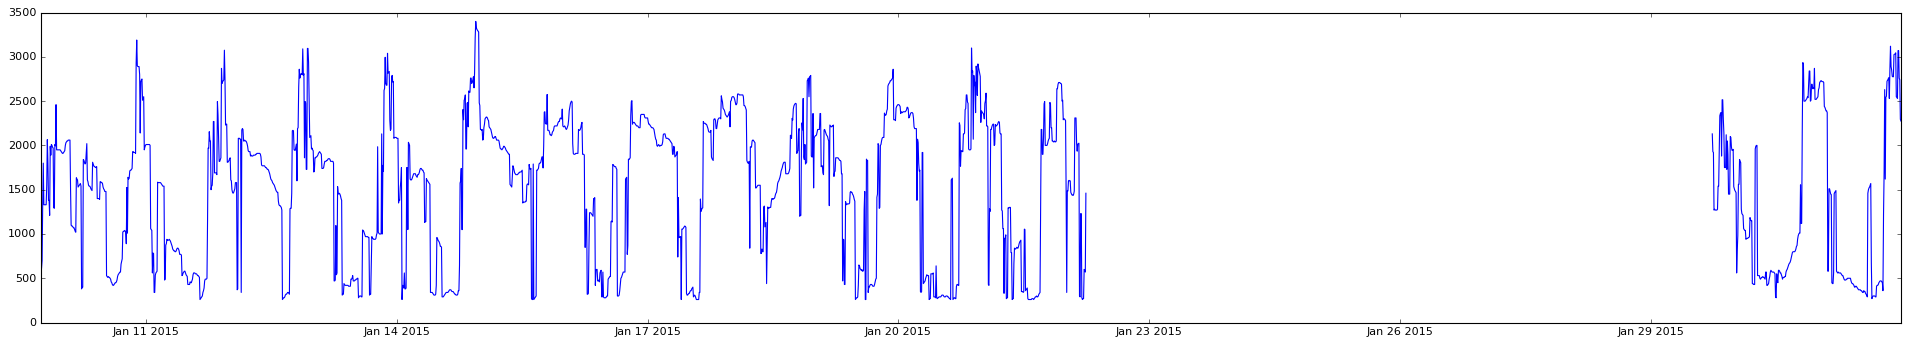

In [16]:
plt.figure(figsize=(30,5))
plt.plot(jan_df.Raw)

------

In [17]:
apr_df = pd.read_csv('/Users/claudiopierard/WRF/Datos/ceilometro/2015_utc/apr_2015_utc.dat', sep = ' ', index_col=0, names = ['Raw', 'Filtered'])

In [18]:
apr_df.index = pd.to_datetime(apr_df.index)

In [19]:
apr_df.shape

(3780, 2)

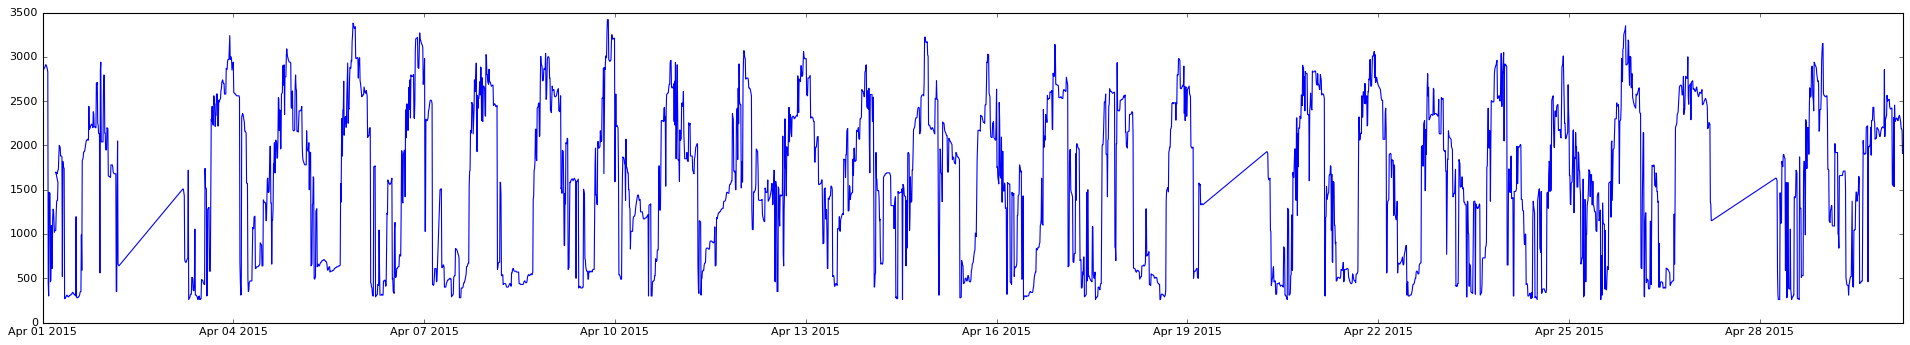

In [20]:
plt.figure(figsize=(30,5))
plt.plot(apr_df.Raw)

In [21]:
new_index = pd.date_range('2015-04-01 00:00:00', '2015-04-30 23:50:00', freq='10Min')

In [22]:
apr_df = apr_df[~apr_df.index.duplicated(keep='first')]

In [23]:
apr_df.shape

(3774, 2)

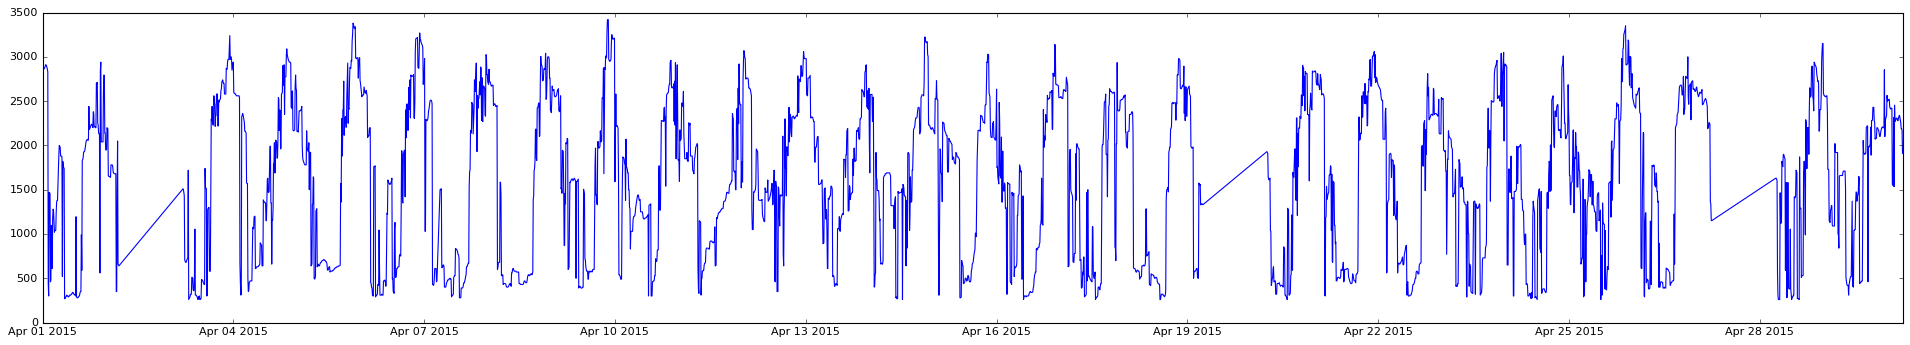

In [24]:
plt.figure(figsize=(30,5))
plt.plot(apr_df.Raw)

In [25]:
apr_df = apr_df.reindex(new_index)

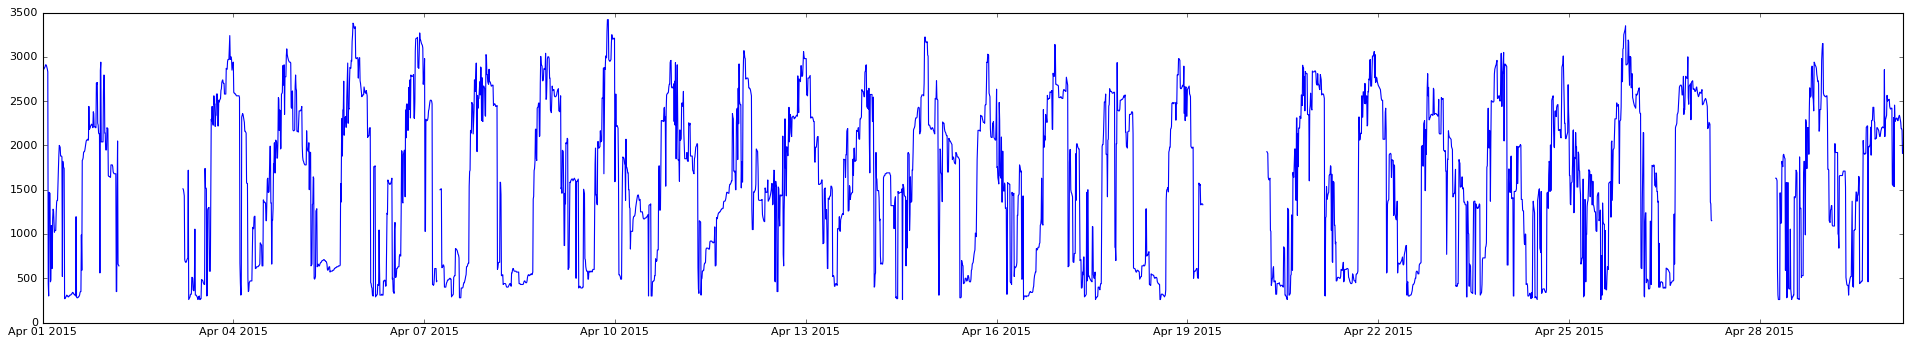

In [26]:
plt.figure(figsize=(30,5))
plt.plot(apr_df.Raw)

------

In [27]:
dic_df = pd.read_csv('/Users/claudiopierard/WRF/Datos/ceilometro/2015_utc/dic_2015_utc.dat', sep=' ', index_col=0, names=['Raw', 'Filtered'])

In [28]:
dic_df.index = pd.to_datetime(dic_df.index)

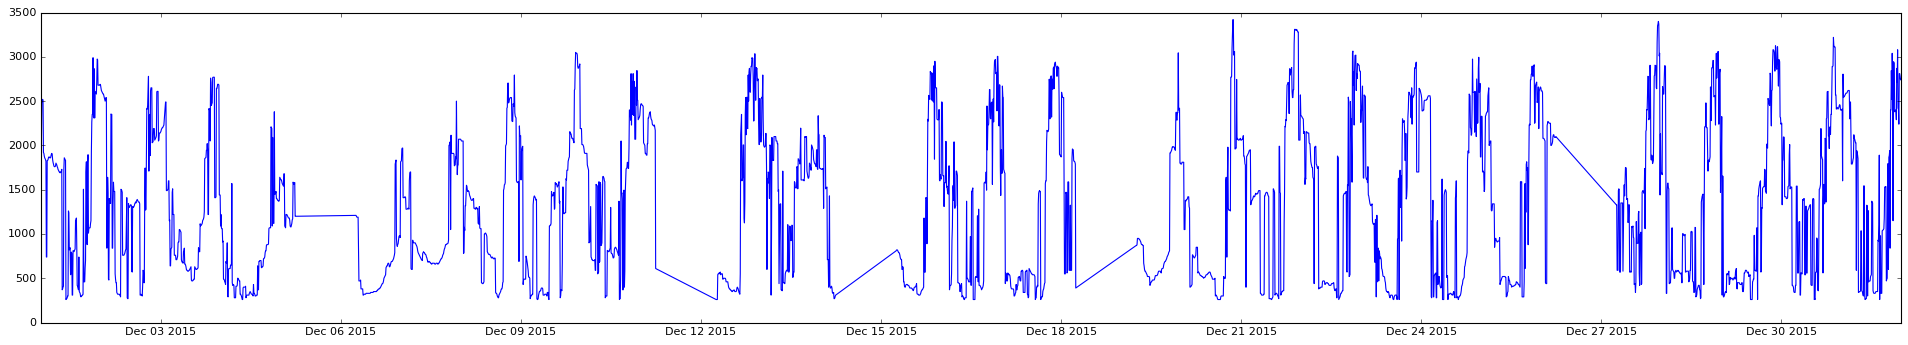

In [29]:
plt.figure(figsize=(30,5))
plt.plot(dic_df.Raw)

In [30]:
new_index = pd.date_range('2015-12-01 00:00:00', '2015-12-31 23:50:00', freq='10Min')

In [31]:
dic_df = dic_df.reindex(new_index)

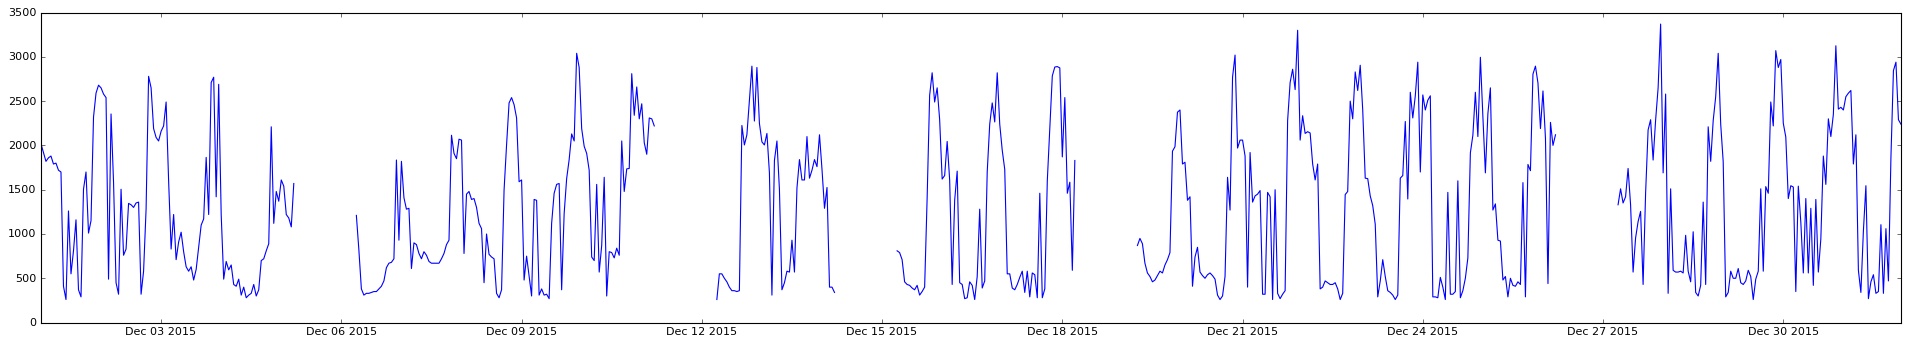

In [32]:
plt.figure(figsize=(30,5))
plt.plot(dic_df.asfreq('1H').Raw)

In [33]:
dic_df.head(10)

                        Raw  Filtered
2015-12-01 00:00:00  2020.0    2020.0
2015-12-01 00:10:00  2000.0    2000.0
2015-12-01 00:20:00  2480.0    2480.0
2015-12-01 00:30:00  2500.0    2500.0
2015-12-01 00:40:00  2520.0    2520.0
2015-12-01 00:50:00  2510.0    2510.0
2015-12-01 01:00:00  1920.0    1920.0
2015-12-01 01:10:00  1910.0    1910.0
2015-12-01 01:20:00  1880.0    1880.0
2015-12-01 01:30:00  1860.0    1860.0

In [34]:
dic_df.asfreq('1H')

                        Raw  Filtered
2015-12-01 00:00:00  2020.0    2020.0
2015-12-01 01:00:00  1920.0    1920.0
2015-12-01 02:00:00  1820.0    1820.0
2015-12-01 03:00:00  1860.0    1860.0
2015-12-01 04:00:00  1880.0    1880.0
2015-12-01 05:00:00  1790.0    1790.0
2015-12-01 06:00:00  1800.0    1800.0
2015-12-01 07:00:00  1720.0    1720.0
2015-12-01 08:00:00  1700.0    1700.0
2015-12-01 09:00:00   410.0     410.0
2015-12-01 10:00:00   260.0     260.0
2015-12-01 11:00:00  1260.0    1260.0
2015-12-01 12:00:00   550.0     550.0
2015-12-01 13:00:00   810.0     810.0
2015-12-01 14:00:00  1160.0    1160.0
2015-12-01 15:00:00   370.0     370.0
2015-12-01 16:00:00   290.0       NaN
2015-12-01 17:00:00  1505.0       NaN
2015-12-01 18:00:00  1700.0       NaN
2015-12-01 19:00:00  1010.0       NaN
2015-12-01 20:00:00  1150.0       NaN
2015-12-01 21:00:00  2320.0    2320.0
2015-12-01 22:00:00  2590.0    2590.0
2015-12-01 23:00:00  2680.0    2680.0
2015-12-02 00:00:00  2650.0    2650.0
2015-12-02 0

# Datos wrf

In [37]:
file_dic_24 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/dic/12_24hrs_D2.mat')
dic_24 = blt.import_var_mat(file_dic_24, 'Atmos')
file_dic_48 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/dic/12_48hrs_d2.mat')
dic_48 = blt.import_var_mat(file_dic_48, 'Atmos')

In [38]:
dic_24['PBLH'].shape

(3, 3, 24, 30)

In [39]:
BEG = pd.date_range('2015-12-01 00:00:00', '2015-12-21 23:00:00', freq='1H')
ENDD = pd.date_range('2015-12-23 00:00:00', '2015-12-31 23:00:00', freq='1H')
dic_t_range = BEG.union(ENDD)

In [40]:
def wrf2dataframe(month_24, month_48, month_t_range):
    month_pblh_24 = []
    month_pblh_avg_24 = []
    month_pblh_48 = []
    month_pblh_avg_48 = []
    for i in range(0,30):
        for j in range(0,24):
            month_pblh_24.append(month_24['PBLH'][1,1,j,i])
            month_pblh_avg_24.append(month_24['PBLH_avg'][0,j,i])
            month_pblh_48.append(month_48['PBLH'][1,1,j,i])
            month_pblh_avg_48.append(month_48['PBLH_avg'][0,j,i])

    month_wrf_df = pd.DataFrame({'PBLH_24' : pd.Series(month_pblh_24, index=month_t_range), 
                               'PBLH_avg_24' : pd.Series(month_pblh_avg_24, index=month_t_range), 
                               'PBLH_48' : pd.Series(month_pblh_48, index=month_t_range), 
                               'PBLH_avg_48' : pd.Series(month_pblh_avg_48, index=month_t_range)})
    return month_wrf_df

##### ** tal vez un squeeze me ahorraria el doble for loop. 

In [41]:
dic_wrf_df = wrf2dataframe(dic_24, dic_48, dic_t_range)

In [42]:
dic_wrf_df.head(30)

                         PBLH_24      PBLH_48  PBLH_avg_24  PBLH_avg_48
2015-12-01 00:00:00     0.000000   971.577148     0.000000  1059.803955
2015-12-01 01:00:00   101.725174   335.785950   104.662033   179.144089
2015-12-01 02:00:00   131.926956    85.622543    74.082077   101.525902
2015-12-01 03:00:00   105.719284    61.860870    57.010666    81.044708
2015-12-01 04:00:00    59.337139   100.200157    33.673248   108.101006
2015-12-01 05:00:00    19.669922    93.422920    19.630249    84.850418
2015-12-01 06:00:00    19.643555    79.026123    32.154694    60.841721
2015-12-01 07:00:00    19.607178    66.496109    29.225725    56.641624
2015-12-01 08:00:00    19.567383   114.628441    24.009413    80.448799
2015-12-01 09:00:00    19.549561    73.753593    23.893055    53.199551
2015-12-01 10:00:00    19.530518    19.619751    23.821281    51.828892
2015-12-01 11:00:00    19.485596    19.559204    25.651783    24.539223
2015-12-01 12:00:00    19.461426    19.550659    29.241463    19

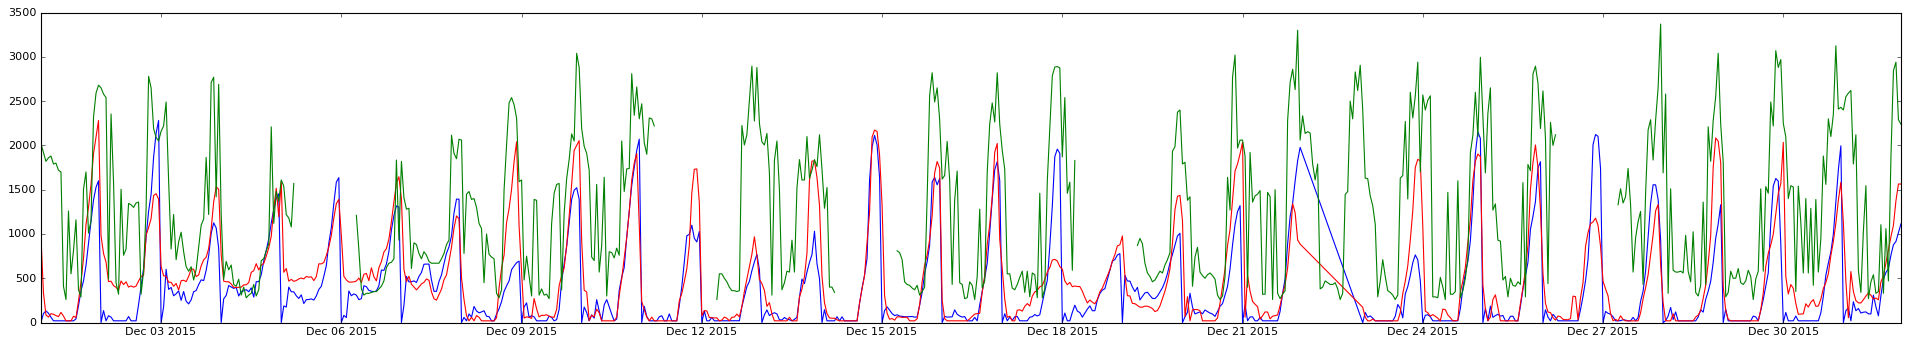

In [43]:
plt.figure(figsize=(30,5))
plt.plot(dic_wrf_df.PBLH_24)
plt.plot(dic_wrf_df.PBLH_48, c='r')
plt.plot(dic_df.asfreq('1H').Raw)


In [44]:
new_index = pd.date_range('2015-12-01 00:00:00', '2015-12-31 23:00:00', freq='1H')

In [45]:
dic_wrf_df = dic_wrf_df.reindex(new_index)

In [46]:
dic_df.Raw.shape

(4464,)

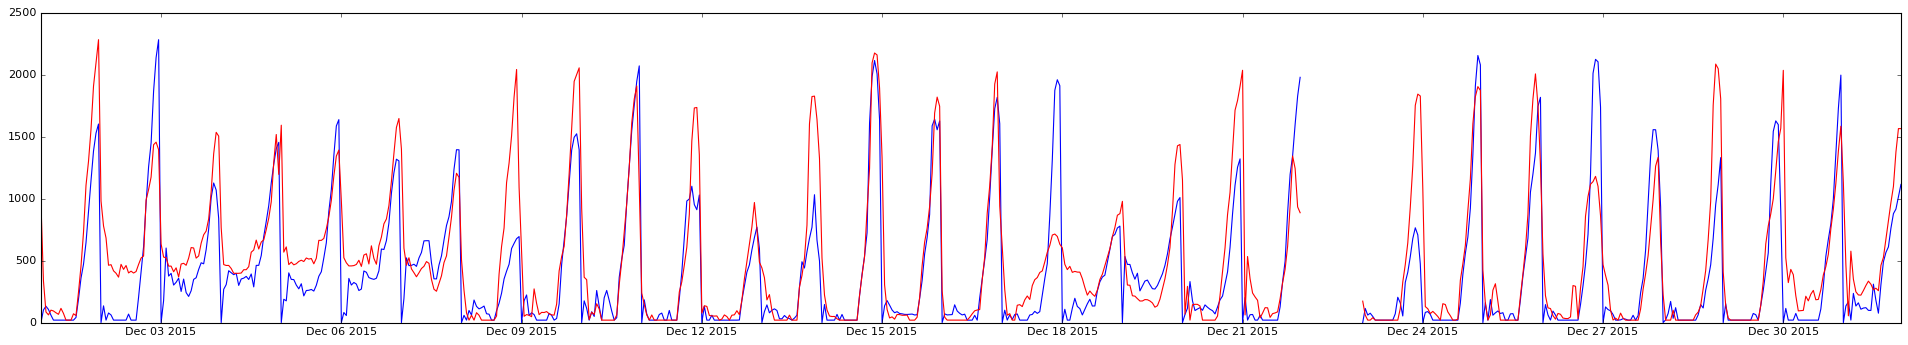

In [47]:
plt.figure(figsize=(30,5))
plt.plot(dic_wrf_df.PBLH_24)
plt.plot(dic_wrf_df.PBLH_48, c='r')

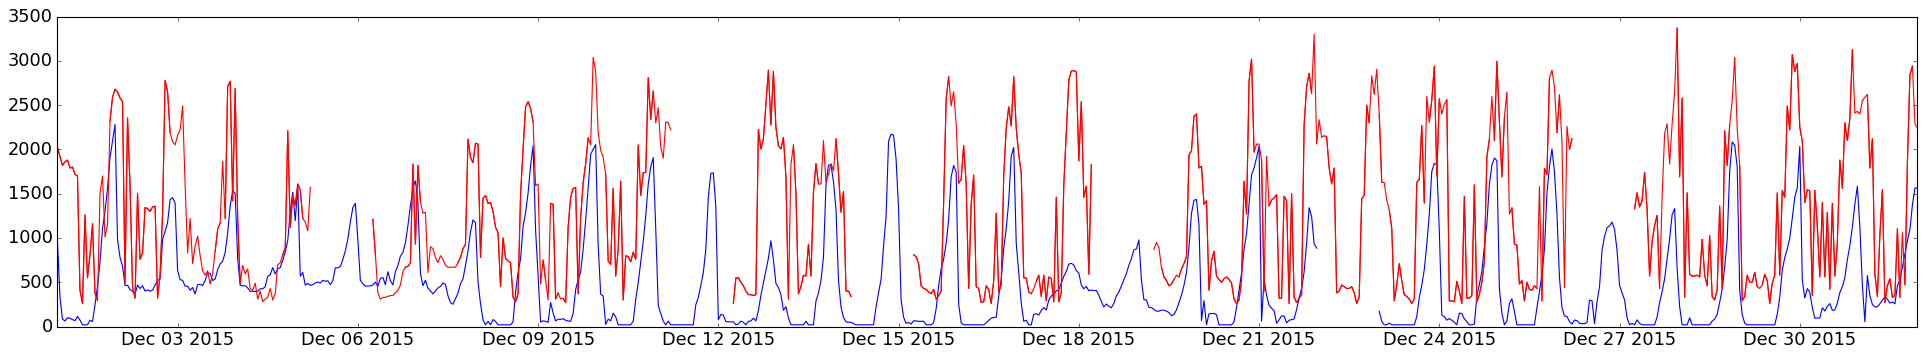

In [48]:
plt.figure(figsize=(30,5))
plt.plot(dic_wrf_df.PBLH_48)
plt.plot(dic_df.asfreq('1H'), c='r')
plt.rcParams.update({'font.size': 16})

------
# Stack overflow question

In [49]:
date_index = pd.date_range('2015-12-01 00:00:00', freq='1H', periods=50)
df = pd.DataFrame(np.random.rand(50), index= date_index, columns=['Data'])

In [50]:
df.head()

                         Data
2015-12-01 00:00:00  0.358540
2015-12-01 01:00:00  0.716478
2015-12-01 02:00:00  0.495243
2015-12-01 03:00:00  0.263090
2015-12-01 04:00:00  0.868901

## SOLVED!

In [51]:
df.between_time('6:00:00', '00:00:00')

                         Data
2015-12-01 00:00:00  0.358540
2015-12-01 06:00:00  0.235080
2015-12-01 07:00:00  0.293461
2015-12-01 08:00:00  0.108170
2015-12-01 09:00:00  0.225442
2015-12-01 10:00:00  0.218620
2015-12-01 11:00:00  0.129968
2015-12-01 12:00:00  0.904996
2015-12-01 13:00:00  0.362065
2015-12-01 14:00:00  0.182962
2015-12-01 15:00:00  0.504640
2015-12-01 16:00:00  0.527698
2015-12-01 17:00:00  0.651053
2015-12-01 18:00:00  0.426244
2015-12-01 19:00:00  0.679852
2015-12-01 20:00:00  0.627720
2015-12-01 21:00:00  0.940274
2015-12-01 22:00:00  0.856985
2015-12-01 23:00:00  0.900924
2015-12-02 00:00:00  0.323292
2015-12-02 06:00:00  0.169885
2015-12-02 07:00:00  0.906274
2015-12-02 08:00:00  0.394752
2015-12-02 09:00:00  0.102840
2015-12-02 10:00:00  0.762887
2015-12-02 11:00:00  0.447499
2015-12-02 12:00:00  0.855695
2015-12-02 13:00:00  0.625501
2015-12-02 14:00:00  0.469252
2015-12-02 15:00:00  0.382983
2015-12-02 16:00:00  0.165647
2015-12-02 17:00:00  0.726201
2015-12-02

----
# Generando un sólo dataframe

##### Diciembre

In [52]:
B = dic_df.asfreq('1H').between_time('06:00:00', '23:00:00')

In [53]:
A = dic_wrf_df#.between_time('06:00:00', '23:00:00')

In [54]:
C = dic_df.rolling(window=7, center=True).mean().asfreq('1H')#.between_time('06:00:00', '23:00:00')

In [55]:
C.columns = ['Raw_mean', 'Filt_mean']

In [56]:
dic_data = pd.concat([A,B,C], axis=1)

In [57]:
dic_data.shape

(744, 8)

In [58]:
dic_data.to_csv('diciembre_dataframe.csv', float_format='%.3f')

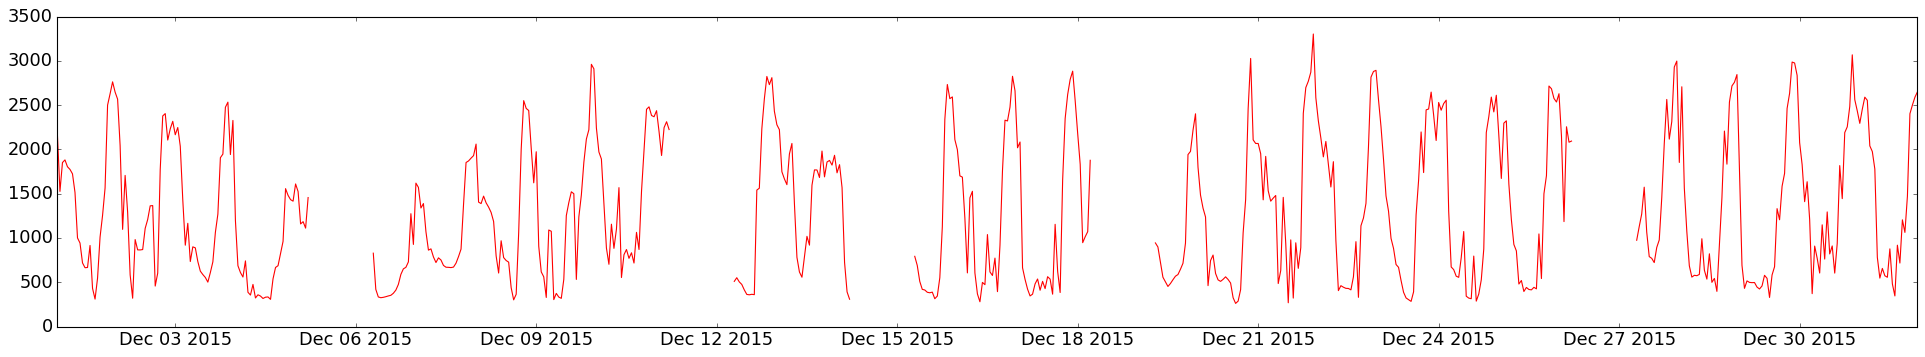

In [59]:
plt.figure(figsize=(30,5))
#plt.plot(dic_data.Raw)
plt.plot(dic_data.Raw_mean, 'r')

# Gunshot plot

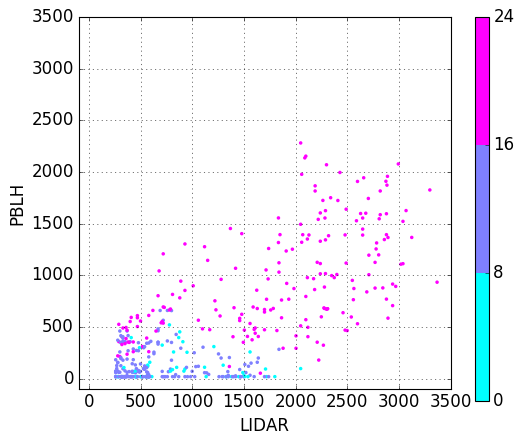

In [60]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# define the data
x = dic_data.Raw #dic_df.asfreq('1H').between_time('06:00:00', '23:00:00').Raw
y = dic_data.PBLH_24 #dic_wrf_df.between_time('06:00:00', '23:00:00').PBLH_24
tag = dic_data.index.hour#dic_wrf_df.between_time('06:00:00', '23:00:00').index.hour
#tag[10:12] = 0 # make sure there are some 0 values to showup as grey

# define the colormap
cmap = plt.cm.cool
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
#cmaplist[0] = (.5,.5,.5,1.0)
# define the bins and normalize
bounds = np.linspace(0,24, 4)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 10)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
ax.set_ylim(-100, 3500)
ax.set_xlim(-100, 3500)
ax.set_xlabel('LIDAR')
ax.set_ylabel('PBLH')
plt.rcParams.update({'font.size': 15})
ax.grid()
#ax.set_title('Well defined discrete colors')
#ax2.set_ylabel('Very custom cbar [-]', size=12)

Con los colores de Bélgica

In [61]:
from scipy.misc import imread

In [62]:
plt.imshow

<function matplotlib.pyplot.imshow>

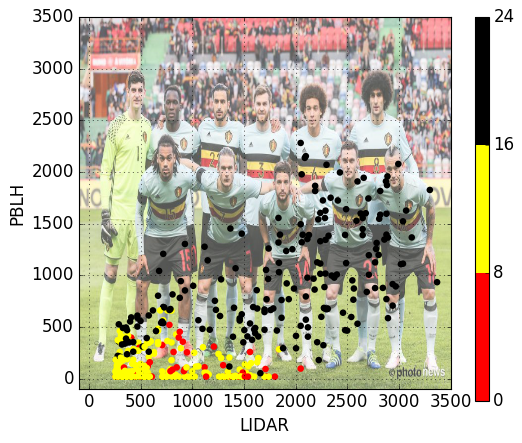

In [63]:
img = imread("lesdiable.jpg")
fig, ax = plt.subplots(1,1, figsize=(6,6))

# define the data
x = dic_data.Raw #dic_df.asfreq('1H').between_time('06:00:00', '23:00:00').Raw
y = dic_data.PBLH_24 #dic_wrf_df.between_time('06:00:00', '23:00:00').PBLH_24
tag = dic_data.index.hour#dic_wrf_df.between_time('06:00:00', '23:00:00').index.hour
#tag[10:12] = 0 # make sure there are some 0 values to showup as grey

# define the colormap
cmap = matplotlib.colors.ListedColormap(['red','yellow', 'black'])
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
#cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
#cmaplist[0] = (.5,.5,.5,1.0)
# define the bins and normalize
bounds = np.linspace(0,24, 4)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
ax.set_ylim(-100, 3500)
ax.set_xlim(-100, 3500)
ax.set_xlabel('LIDAR')
ax.set_ylabel('PBLH')
ax.imshow(img,zorder=0, extent=[-100.0, 3500.0, -100.0, 3500], alpha=0.7)
ax.grid()
#ax.set_title('Well defined discrete colors')
#ax2.set_ylabel('Very custom cbar [-]', size=12)

# #Tousensemble

In [64]:
import scipy.optimize as optimization

In [65]:
def ajuste_lineal(x, a, b):
    return a + x*b

- Tengo que quitar los **`NaNs`** usando **`df.dropna()`**.
- **Verificar** que el **ajuste lineal** esté bien hecho.

In [66]:
dic_data.shape

(744, 8)

In [67]:
dic_data.dropna(thresh=6).head(20)

                         PBLH_24      PBLH_48  PBLH_avg_24  PBLH_avg_48  \
2015-12-01 01:00:00   101.725174   335.785950   104.662033   179.144089   
2015-12-01 02:00:00   131.926956    85.622543    74.082077   101.525902   
2015-12-01 03:00:00   105.719284    61.860870    57.010666    81.044708   
2015-12-01 04:00:00    59.337139   100.200157    33.673248   108.101006   
2015-12-01 05:00:00    19.669922    93.422920    19.630249    84.850418   
2015-12-01 06:00:00    19.643555    79.026123    32.154694    60.841721   
2015-12-01 07:00:00    19.607178    66.496109    29.225725    56.641624   
2015-12-01 08:00:00    19.567383   114.628441    24.009413    80.448799   
2015-12-01 09:00:00    19.549561    73.753593    23.893055    53.199551   
2015-12-01 10:00:00    19.530518    19.619751    23.821281    51.828892   
2015-12-01 11:00:00    19.485596    19.559204    25.651783    24.539223   
2015-12-01 12:00:00    19.461426    19.550659    29.241463    19.513210   
2015-12-01 13:00:00    19

In [68]:
popt, pcov = optimization.curve_fit(ajuste_lineal, dic_data.dropna(thresh=6).Raw, dic_data.dropna(thresh=6).PBLH_24) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [69]:
ajuste_lineal(dic_data.Raw, *popt);

In [70]:
-6%24

18

#### Raw vs PBLH_24

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


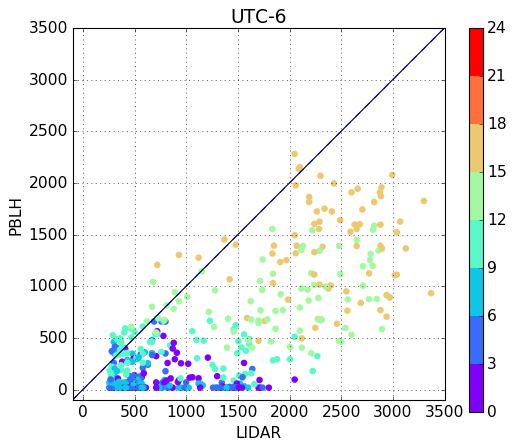

In [79]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# Datos
x = dic_data.Raw  #dic_df.asfreq('1H').between_time('06:00:00', '23:00:00').Raw
y = dic_data.PBLH_24  #dic_wrf_df.between_time('06:00:00', '23:00:00').PBLH_24
tag = (dic_data.index.hour-6)%24#dic_wrf_df.between_time('06:00:00', '23:00:00').index.hour

##Ajuste lineal
popt, pcov = optimization.curve_fit(ajuste_lineal, dic_data.dropna(thresh=6).Raw, dic_data.dropna(thresh=6).PBLH_24) 

# define the colormap
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

#Format
ax.set_ylim(-100, 3500)
ax.set_xlim(-100, 3500)
ax.set_xlabel('LIDAR')
ax.set_ylabel('PBLH')
xx = np.linspace(-100, 3500, 10)

ax.plot(xx, ajuste_lineal(xx, *popt), c = 'k') #plot linear fit
ax.plot(xx, ajuste_lineal(xx, 0, 1), '--') #Plot identity
plt.rcParams.update({'font.size': 14})
ax.set_title('UTC-6')
ax.grid()
#ax.set_title('Well defined discrete colors')
#ax2.set_ylabel('Very custom cbar [-]', size=12)

#### Raw vs PBLH_avg_24

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


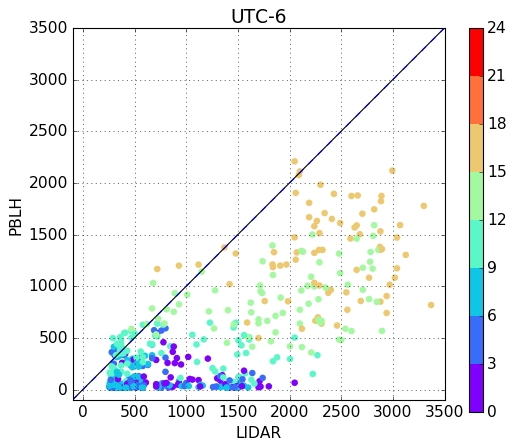

In [81]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# Datos
x = dic_data.Raw  #dic_df.asfreq('1H').between_time('06:00:00', '23:00:00').Raw
y = dic_data.PBLH_avg_24  #dic_wrf_df.between_time('06:00:00', '23:00:00').PBLH_24
tag = (dic_data.index.hour-6)%24#dic_wrf_df.between_time('06:00:00', '23:00:00').index.hour

##Ajuste lineal
popt, pcov = optimization.curve_fit(ajuste_lineal, dic_data.dropna(thresh=6).Raw, dic_data.dropna(thresh=6).PBLH_avg_24) 

# define the colormap
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

#Format
ax.set_ylim(-100, 3500)
ax.set_xlim(-100, 3500)
ax.set_xlabel('LIDAR')
ax.set_ylabel('PBLH')
xx = np.linspace(-100, 3500, 10)

ax.plot(xx, ajuste_lineal(xx, *popt), c = 'k') #plot linear fit
ax.plot(xx, ajuste_lineal(xx, 0, 1), '--') #Plot identity
plt.rcParams.update({'font.size': 14})
ax.set_title('UTC-6')
ax.grid()
#ax.set_title('Well defined discrete colors')
#ax2.set_ylabel('Very custom cbar [-]', size=12)

#### Raw_mean vs PBLH_24

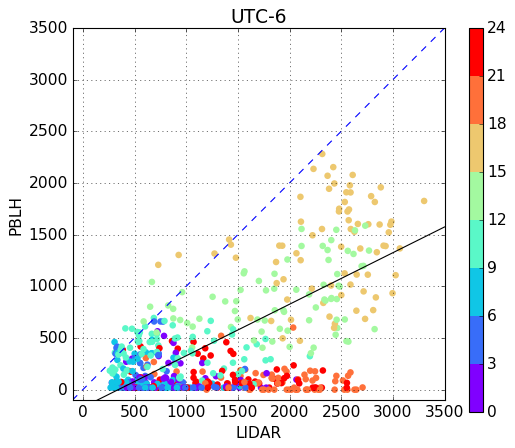

In [73]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# Datos
x = dic_data.Raw_mean  #dic_df.asfreq('1H').between_time('06:00:00', '23:00:00').Raw
y = dic_data.PBLH_24  #dic_wrf_df.between_time('06:00:00', '23:00:00').PBLH_24
tag = (dic_data.index.hour-6)%24#dic_wrf_df.between_time('06:00:00', '23:00:00').index.hour

##Ajuste lineal
popt, pcov = optimization.curve_fit(ajuste_lineal, dic_data.dropna(thresh=7).Raw_mean, dic_data.dropna(thresh=7).PBLH_24) 

# define the colormap
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

#Format
ax.set_ylim(-100, 3500)
ax.set_xlim(-100, 3500)
ax.set_xlabel('LIDAR')
ax.set_ylabel('PBLH')
xx = np.linspace(-100, 3500, 10)

ax.plot(xx, ajuste_lineal(xx, *popt), c = 'k') #plot linear fit
ax.plot(xx, ajuste_lineal(xx, 0, 1), '--') #Plot identity
plt.rcParams.update({'font.size': 14})
ax.set_title('UTC-6')
ax.grid()
#ax.set_title('Well defined discrete colors')
#ax2.set_ylabel('Very custom cbar [-]', size=12)

#### Raw_mean vs PBLH_avg_24

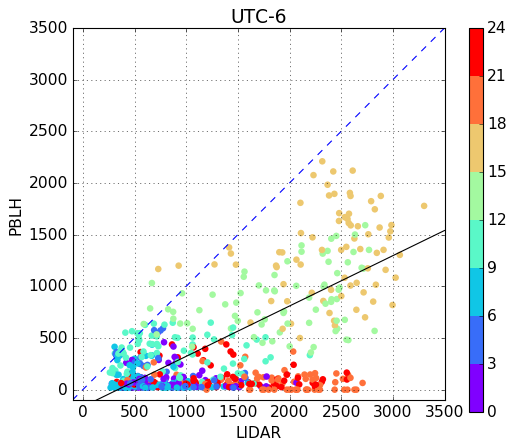

In [82]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# Datos
x = dic_data.Raw_mean  #dic_df.asfreq('1H').between_time('06:00:00', '23:00:00').Raw
y = dic_data.PBLH_avg_24  #dic_wrf_df.between_time('06:00:00', '23:00:00').PBLH_24
tag = (dic_data.index.hour-6)%24#dic_wrf_df.between_time('06:00:00', '23:00:00').index.hour

##Ajuste lineal
popt, pcov = optimization.curve_fit(ajuste_lineal, dic_data.dropna(thresh=7).Raw_mean, dic_data.dropna(thresh=7).PBLH_avg_24) 

# define the colormap
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

#Format
ax.set_ylim(-100, 3500)
ax.set_xlim(-100, 3500)
ax.set_xlabel('LIDAR')
ax.set_ylabel('PBLH')
xx = np.linspace(-100, 3500, 10)

ax.plot(xx, ajuste_lineal(xx, *popt), c = 'k') #plot linear fit
ax.plot(xx, ajuste_lineal(xx, 0, 1), '--') #Plot identity
plt.rcParams.update({'font.size': 14})
ax.set_title('UTC-6')
ax.grid()
#ax.set_title('Well defined discrete colors')
#ax2.set_ylabel('Very custom cbar [-]', size=12)

-------
# Generando csv para abril